In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import gc
import os 
import fpfs
import galsim
import numpy as np
import matplotlib.pylab as plt
from astropy.visualization import simple_norm
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy.lib.recfunctions as rfn

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

2023/05/10 03:11:34 ---  Processing for g1-2222, and shears for four redshift bins are [0.02 0.02 0.02 0.02].


Making Basic Simulation. ID: 2


5

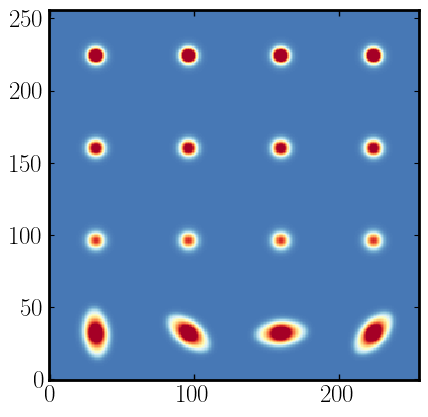

In [2]:
ngrid = 256
shear_value = 0.02
scale = 0.168
outDir='galaxy_basicCenter_psf60'
psfInt = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)
psf_data = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=ngrid, ny=ngrid, scale=scale).array

# Four Galaxies to ngrid spin-2 and spin-4 ansiotropies
# spin-2 is shape noise in diagnonal elements of shear response matrix
# spin-4 is shape noise in diagnonal and of-diagnoal elements of shear response matrix, 
# but an order of magnitude smaller than spin-2
gal_data = fpfs.simutil.make_basic_sim(
    outDir,psf_obj=psfInt,gname='g1-2222',
    ind0=2,ny=ngrid,nx=ngrid, scale=scale,
    do_write=False,return_array=True,
    shear_value = shear_value)
plt.close()
plt.imshow(gal_data,aspect='equal',cmap='RdYlBu_r',origin='lower',interpolation='None',\
             norm=simple_norm(gal_data,'asinh',asinh_a=0.1,min_cut=-0.01,max_cut=0.3))
gc.collect()

In [3]:
coords = fpfs.image.detect_sources(
    gal_data,
    psf_data,
    gsigma=0.24,
    thres=0.01,
    thres2=-0.00,
    klim = 2.95,
)
print(coords.shape)

2023-05-10 03:11:36.296117: I external/xla/xla/service/service.cc:168] XLA service 0x560d64da2cf0 initialized for platform Interpreter (this does not guarantee that XLA will be used). Devices:
2023-05-10 03:11:36.296148: I external/xla/xla/service/service.cc:176]   StreamExecutor device (0): Interpreter, <undefined>
2023/05/10 03:11:36 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-10 03:11:36.303110: I external/xla/xla/pjrt/tfrt_cpu_pjrt_client.cc:218] TfrtCpuClient created.
2023/05/10 03:11:36 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-05-10 03:11:36.304601: I external/xla/xla/stream_executor/tpu/tpu_initializer_helper.cc:269] Libtpu path is: libtpu.so
2023-05-10 03:11:36.304935: I external/xla/xla/stream_executor/tpu/tpu_initializer_helper.cc:277] Failed to open libtpu: libtpu.so: cannot open shared object file: No such file or directory
2023

(16, 2)


In [4]:
rcut = 16
psf_data = psfInt.shift(0.5 * scale, 0.5 * scale).drawImage(nx=rcut*2, ny=rcut*2, scale=scale).array

fpTask  =   fpfs.image.measure_source(psf_data, sigma_arcsec=0.7)
mms =  fpTask.measure(gal_data, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print(shear)

2023/05/10 03:11:37 ---  Shapelet kernel in configuration space: sigma= 0.7000 arcsec
2023/05/10 03:11:37 ---  Detection kernel in configuration space: sigma= 0.7000 arcsec


0.019995979200220573
